Importes that you might need are given below

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elira\AppData\Local\Temp\ipykernel_7028\4074645173.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("sim.log",sep='\s+')


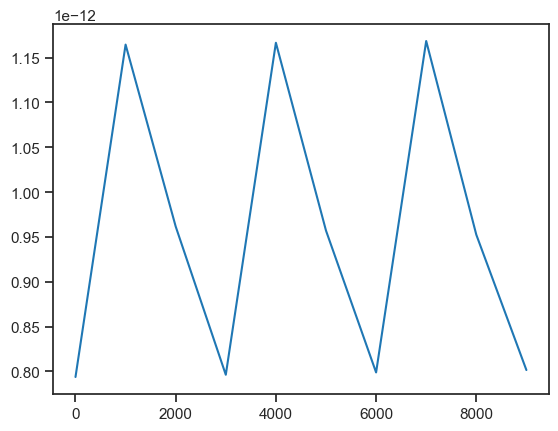

In [ ]:
df = pd.read_csv("sim.log",sep='\s+')
df
plt.plot(df["step"].values,df["E"].values )


In [ ]:
mass = 6.6E-26
omega = 1.2E16
(5/1E10*omega)**2*0.5*mass #חישנו מראש את האנרגיה הכוללת, ויצא קרוב לתוצאות




1.188e-12

# The Harmonic Oscillator

Start with one dimensional harmonic trap: $V=\frac{1}{2}m\omega^2 x^2$

**Simulation details:**

Number of particles: 1.

Initial position: x = 5 Angstrom.

Initial momenta: Zero.

Nsteps = 10000.

trap frequency, $\hbar\omega = 50 meV$

**Questions \& Figures**


1. Figure 1: Plot the change in the total energy with respect to t=0 (in precent) vs. time for different values of dt.
What is the largest dt you can use so that the energy is conserved better than 0.1% of its initial value?
1. Figure 2: Plot the position of the particle vs. time. Explain the observed dynamics.
1. Figure 3: Plot the potential and kinteic energies vs. time.
1. Figure 4: Plot the histogram of the position of the particle.
1. Figure 5: Plot the histogram of the momenta of the particle.
Explain the shape of the histograms in Figures 4-5. How do you excpect them to change in the canonical ensemble?


## figure 1

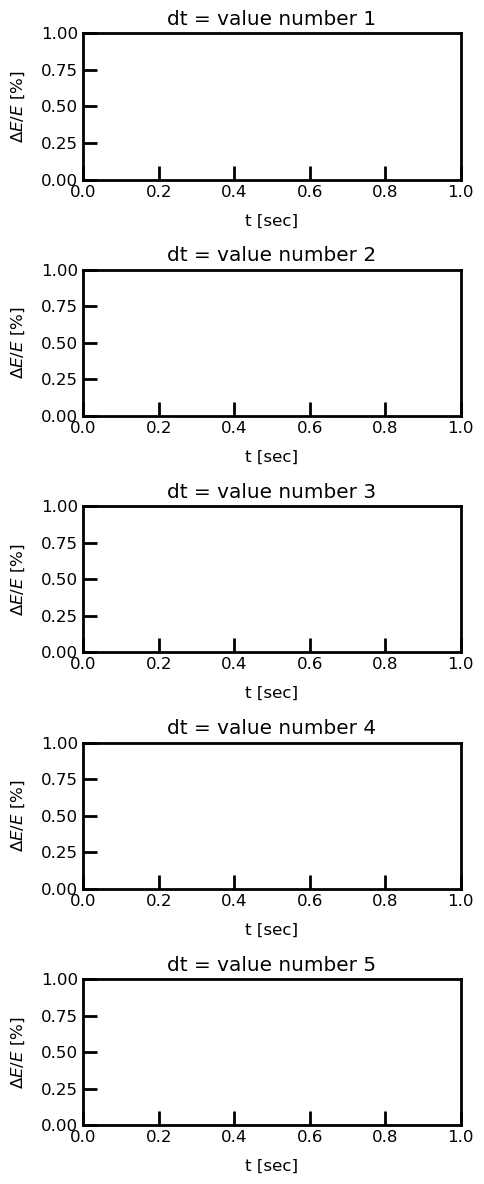

In [21]:
# just an example, you can do somthing else
fig, ax = plt.subplots(5,1,figsize=(5,12))
for i in range(5):
    ###########################################################
    #### enter your code for uploading your simulation data ###
    ###########################################################
    ax[i].set_title('dt = value number '+str(i+1))
    ax[i].set_xlabel('t [sec]')
    ax[i].set_ylabel(r'$\Delta E/E$ [%]')
plt.tight_layout()
